# Diabetes example
$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
$$

__<div style="text-align: right"> EE787: Machine learning, Kyung Hee University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@khu.ac.kr) </div>_

In [1]:
# load diabetes.data

using LinearAlgebra
using PyPlot
using CSV

Diabete_Data = CSV.read(download("https://web.stanford.edu/~hastie/Papers/LARS/diabetes.data"))

n,d = size(Diabete_Data)
d = d-1

println(Diabete_Data)

--2019-09-26 10:56:18--  https://web.stanford.edu/~hastie/Papers/LARS/diabetes.data
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18496 (18K)
Saving to: ‘/tmp/juliauQDx7W’

     0K .......... ........                                   100% 88.6K=0.2s

2019-09-26 10:56:19 (88.6 KB/s) - ‘/tmp/juliauQDx7W’ saved [18496/18496]



442×11 DataFrames.DataFrame
│ Row │ AGE   │ SEX   │ BMI     │ BP      │ S1    │ S2      │ S3      │ S4      │ S5      │ S6    │ Y     │
│     │ Int64 │ Int64 │ Float64 │ Float64 │ Int64 │ Float64 │ Float64 │ Float64 │ Float64 │ Int64 │ Int64 │
├─────┼───────┼───────┼─────────┼─────────┼───────┼─────────┼─────────┼─────────┼─────────┼───────┼───────┤
│ 1   │ 59    │ 2     │ 32.1    │ 101.0   │ 157   │ 93.2    │ 38.0    │ 4.0     │ 4.8598  │ 87    │ 151   │
│ 2   │ 48    │ 1     │ 21.6    │ 87.0    │ 183   │ 103.2   │ 70.0    │ 3.0     │ 3.8918  │ 69    │ 75    │
│ 3   │ 72    │ 2     │ 30.5    │ 93.0    │ 156   │ 93.6    │ 41.0    │ 4.0     │ 4.6728  │ 85    │ 141   │
│ 4   │ 24    │ 1     │ 25.3    │ 84.0    │ 198   │ 131.4   │ 40.0    │ 5.0     │ 4.8903  │ 89    │ 206   │
│ 5   │ 50    │ 1     │ 23.0    │ 101.0   │ 192   │ 125.4   │ 52.0    │ 4.0     │ 4.2905  │ 80    │ 135   │
│ 6   │ 23    │ 1     │ 22.6    │ 89.0    │ 139   │ 64.8    │ 61.0    │ 2.0     │ 4.1897  │ 68    │ 97    │


In [2]:
# compute the optimal theta

X = zeros(n,d)
y = zeros(n,1)

for i=1:d
    X[:,i] = Diabete_Data[:,i]
end
#X = [ones(n,1)  X[:,3]]
X = [ones(n,1) X]
y = Diabete_Data[:,end]

theta_opt = X\y

# achieved loss
MSE = norm(X*theta_opt-y,2)^2/n

println("theta_opt: ", theta_opt)
println("RMSE: ",sqrt(MSE))

theta_opt: [-334.567, -0.0363612, -22.8596, 5.60296, 1.11681, -1.09, 0.74645, 0.372005, 6.53383, 68.4831, 0.280117]
RMSE: 53.476128764026576


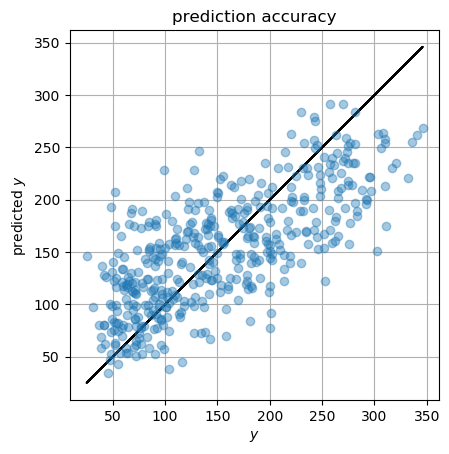

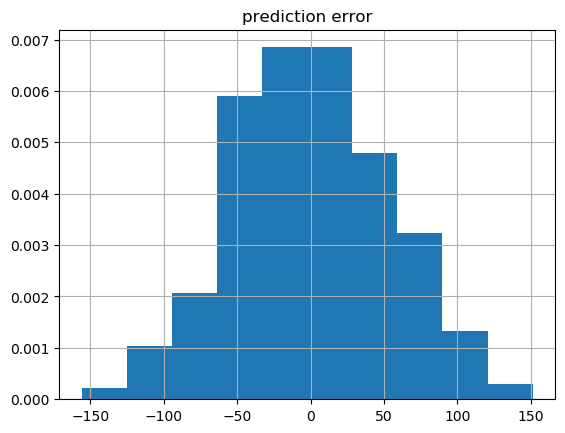

In [3]:
# plot
figure()
plot(y,y,"k")
plot(y,X*theta_opt,"o",alpha=0.4)
xlabel(L"$y$")
ylabel(L"predicted $y$")
title("prediction accuracy")
axis("square")
grid("on")

figure()
hist(y-X*theta_opt, bins=10, density=true)
title("prediction error")
grid("on")


In [4]:
# put JHK data into your predictor

#age
#sex
#bmi
#map	   mean arterial pressure				
#s1  tc :   total cholesterol
#s2  ldl    low density lipoprotein
#s3  hdl    high density lipoprotein
#s4  tch
#s5  ltg
#s6  glu
#        age  sex  bmi    map   tc     ldl    hdl     tch   ltg   glu
X_JHK = [41   1    18.3   90    171    80.0   74.9    2     4.75  90.0]
X_JHK = [1 X_JHK]

y_JHK = X_JHK*theta_opt


1-element Array{Float64,1}:
 108.89218184854845

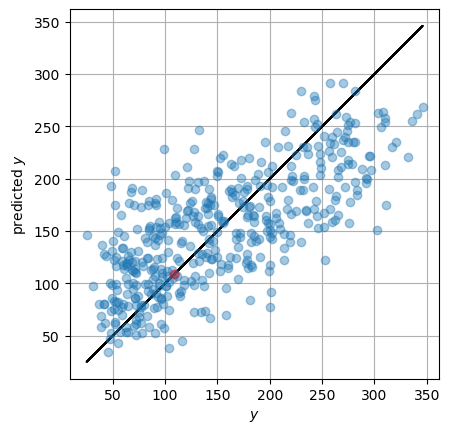

In [5]:
# plot

using PyPlot;

figure()
plot(y,y,"k")
plot(y,X*theta_opt,"o",alpha=0.4)
plot(y_JHK,y_JHK,"ro",alpha=0.4)
xlabel(L"$y$")
ylabel(L"predicted $y$")
axis("square")
grid("on")